# 第3章 （2） Numpy, Pandas入門

機械学習では数学を使う．行列やベクトルの演算を行うライブラリがNumpyである．  
ここではNumpyの説明を行う．

# Numpy入門

In [37]:
# numpyをインポートして名前をnpにする．numpyのメソッドは，np.***で使える．
import numpy as np

In [5]:
# 行列
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
# ベクトル
x = np.array([[1],[2],[3]])
print(x)

[[1]
 [2]
 [3]]


In [7]:
# 行列とベクトルの演算
b = np.dot(A, x)
print(b)

[[14]
 [32]
 [50]]


In [9]:
# こちらは違う
A * x

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [11]:
# わかりやすく実行すると
x = np.array([[10],[100],[1000]])
A * x

array([[  10,   20,   30],
       [ 400,  500,  600],
       [7000, 8000, 9000]])

In [12]:
#  定数倍
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

# 行列の初期化

In [14]:
# ゼロで初期化
A = np.zeros((3,4))
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [15]:
# 乱数で初期化(0.0から1.0の一様乱数)
A = np.random.rand(2,3)
print(A)

[[0.23104951 0.67606189 0.75794266]
 [0.45010905 0.51238824 0.99298503]]


In [16]:
# 乱数で初期化(標準正規分布 (平均0, 標準偏差1))
A = np.random.randn(2,3)
print(A)

[[ 0.48488299 -0.60245066 -0.13032381]
 [-0.0468064   0.20176063  0.35470923]]


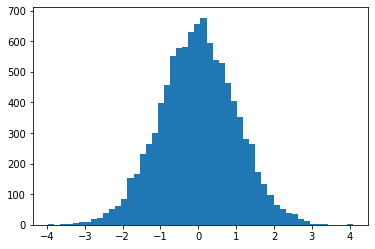

In [22]:
# せっかくなので標準正規分布を描いてみよう
import matplotlib.pyplot as plt

x = np.random.randn(10000)
y = plt.hist(x, bins=50) # binsは区切る個数

plt.show()

# 固有値，固有ベクトル

In [23]:
A = np.array([[6,2],[2,3]])
la, v = np.linalg.eig(A)
print(la)
print(v)
print(2/np.sqrt(5), 1/np.sqrt(5))
print(-1/np.sqrt(5), 2/np.sqrt(5))
print(v[0])
print(v[:,0])

[7. 2.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
0.8944271909999159 0.4472135954999579
-0.4472135954999579 0.8944271909999159
[ 0.89442719 -0.4472136 ]
[0.89442719 0.4472136 ]


# 逆行列，転置，内積

In [25]:
A = np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [27]:
invA = np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [29]:
np.dot(invA, A)

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

# 連立一次方程式を解いてみる

$$
\begin{cases}
  x+3y=4  \\
  2x+7y=6 \\
\end{cases}
$$

In [31]:
# 行列A
A = np.array([[1,3],[2,7]])

# ベクトルb
b = np.array([[4],[6]])

# Ax = b
# を
# 左からAの逆行列をかけて
# x = A^-1 b
# のようにして解く

invA = np.linalg.inv(A)
x = np.dot(invA, b)
print(x)

[[10.]
 [-2.]]


In [32]:
# 確認
print(np.dot(A, x))

[[4.]
 [6.]]


# ある関数のグラフを作成し，画面表示する

表示する関数

$$
 f(x)=x^4 - 8x^3 + 18x^2 - 3x +1
$$

In [1]:
# 数値計算を行いたいので，numpyをインポート
import numpy as np

In [2]:
# グラフ表示したい関数
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y

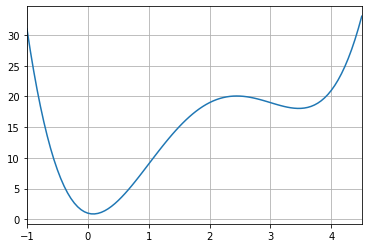

In [4]:
# 作成した関数のグラフを表示する
import matplotlib.pyplot as plt

# 定義域を設定
xmin = -1.0
xmax = 4.5
num = 100 # xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# 関数から値域を取得
y = mathfunc(x)

# 点どうしを直線でつなぐ
plt.plot(x, y)

# 適切な表示範囲を指定
plt.xlim(xmin, xmax)

# グリッド追加
plt.grid(True)

# 表示
plt.show()

# Pandas入門

データサイエンスでは，Excelのような表計算を行いときがある．  
Numpyの2次元リストを使えば，ある程度は可能であるが，Pandasはデータ処理を強力に行うライブラリが多数用意されています．  

機械学習で有名なアヤメのデータを使って解説を行う．  
アヤメのデータをインターネットからダウンロードできるが，ここではscikit-learnにあるアヤメデータを使う．  
アヤメのデータは[https://archive.ics.uci.edu/ml/datasets/Iris](https://archive.ics.uci.edu/ml/datasets/Iris)からダウンロードできる．


![title](./img/iris.img)

アヤメには，ヒオウギアヤメ(Setosa)、ハナショウブ(Versicolor)、カキツバタ(Virginica)の3種類がある．  
これらの花は画像のようによく似ているが，がく片と花びらの形が異なっており，これらのデータから，アヤメの種類を当てる問題である．  
入力データは4つの特徴ベクトルとなる．  

がく片の縦幅 : sepal_length  
がく片の横幅 : sepal_width  
花びらの縦幅 : petal_length  
花びらの横幅 : petal_width  


iris.csvファイルをGitHubのサイトからダウンロードする．

In [54]:
import pandas as pd

df = pd.read_csv('iris.csv', header=None)

In [55]:
ｄｆ

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


カラムは左からsepal_length, sepal_width, petal_length, petal_widthなので，わかりやすくするためにこれを与える．

In [59]:
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']

In [63]:
df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [70]:
# ラベル（つまり，花の種類）が何種類か調べる
df.label.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [73]:
len(df.label.unique())

3

In [76]:
# それぞれのラベルの数を調べる
df.label.value_counts()

virginica     50
versicolor    50
setosa        50
Name: label, dtype: int64

In [78]:
# データの基本統計量を調べる
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


基本統計量の読み方

|英名|日本語訳|
|-|-|
|count|レコード数|
|mean|平均|
|std|標準偏差|
|min|最小値|
|25%|25%パーセンタイル|
|50%|中央値 (50%パーセンタイル)|
|75%|75%パーセンタイル|
|max|最大値|

![title](./img/describe.jpg)
<img src='./img/box.png' width='500px'>

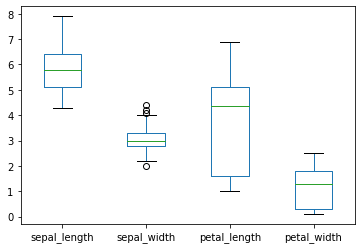

In [80]:
# 箱ひげ図を作成する
df.plot.box()

# 丸は外れ値を表している
# 外れ値はQ1(25%点)-1.5xIQR四分位範囲より小さい
# 外れ値はQ3(75%点)+1.5xIQR四分位範囲より大きい